In [153]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


In [154]:
import warnings
warnings.filterwarnings('ignore')

# Descrizione del problema e comprensione dei dati



 
**Indiani di Pima Diabete Dataset**

 Il dataset utilizzato proviene dal National Institute of Diabetes and Digestive and Kidney Diseases (Maryland, Stati Uniti), in particolare i dati a nostra disposizione rappresentano un sottogruppo dell'intero dataset di partenza detenuto dall'istituto in cui ci si analizzano esclusivamente soggetti femminili di età non inferiore ai 21 e appartenenti alla comunità dei nativi americani di Pima.
 

L'obiettivo è quello di predirre la variabile target binaria discreta Outcome  in base alle caratteristiche riportate nel dataset.

Outcome assumerà valore 1 se il paziente preso in esame è affetto da diabete.
Outcome assumerà valore 0 se il paziente preso in esame non è affetto da diabete.

In [10]:
pazienti = pd.read_csv("/content/diabetes.csv")

**Descrizione delle features**
>**Pregnancies**: Numero di gravidanze

>**Glucose**: Concetrazione di glucosio nel plasma 
>**BloodPressure**: Pressione diastolica (mm Hg)

>**SkinThickness**: Spessore della pelle in prossimità del tricipite (mm)

>**Insulin**: Insulina (U/mL)

>**BMI**: Indice massa corporea (kg/m^2)

>**Diabetes Pedigree Function**: punteggio che indica la predisposizione al diabete del paziente basandosi sulla sua storia clinica familiare.

>**Age**: Età (anni)

>**Outcome**: Variabile target (assume valori 0 o 1)

In [11]:
pazienti.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Il dataset contiene 768 records, di cui è possibile osservare i dettagli nella cella successiva.

In [12]:
pazienti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#Analisi esplorativa

Si procede di seguito con un'analisi esplorativa del dataset, stampando inanzitutto un'analisi descrittiva dei dati.

In [21]:
pazienti.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In tabella è possibile osservare statistiche descrittive per il dataset scelto, dalle quali è possibile ricavare il valore medio  assunto dalle features, il loro scarto quadratico media, minimo, massimo e percentili.
Mediamente possiamo notare che le pazienti prese in esame hanno 33 anni di età,  una corpuratura tendente al sovrappeso e  intrapreso circa 4 gravidanze. 

Considerando che:
* Soggetti sani hanno valori compresi tra 70 e 99 mg/dl,

* Un valore compreso tra 100 e 125 mg/dl è indicativo di alterata glicemia a digiuno (pre-diabete)

* Un valore pari a 126 mg/dl o superiore nella maggior parte dei casi è segno di diabete.

e che 
* I valori normali dell'insulina devono essere compresi, nei maschi e nelle femmine, tra 4 e 24 micro-unità per millilitro di sangue. (l'intervallo di riferimento per l'insulinemia può cambiare in funzione di età, sesso e strumentazione in uso nel laboratorio analisi)

Le pazienti del dataset hanno in generale valori di glicemia e insulina alterati.


La tabella  mostra come per ogni features siano presenti 768 istanze, tuttavia alcune colonne presentano un valore minimo 0 che non risulta un valore coerente al contesto che stiamo analizzando e che quindi esprimono la presenza di valori mancanti. In particolare ciò accade nel caso di: Glucose, BloodPressure, SkinThickness, Insulin e BMI.


Questo può accadere spesso quando si tratta di dati medici poiché non sempre per ogni paziente vengono effettuate tutte le misurazioni, decidiamo di gestire questa mancanza poichè semplicemente eliminando le righe che presentano valori nulli scarteremmo molti dati significativi e  il dataset rimanente sarebbe un dataset troppo piccolo.


In [22]:
zeroFeatures = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']
(pazienti[zeroFeatures] == 0).sum() 


Glucose          0
BloodPressure    0
SkinThickness    0
BMI              0
Insulin          0
dtype: int64

Si sostituiscono gli zeri presenti nelle colonne sopracitate con Nan in modo che sia possibile osservare i dati senza che i valori siano alterati dalla presenza di zero non significativi. Utilizzando il grafico e l'analisi descrittiva si ricavano informazioni circa la simmetria e l'assimetria delle distribuzioni, l'assimetria è quanto la distribuzione delle features si discosta dalla distribuzione normale.
Per le features con distribuzione  simmetrica i valori nulli verranno sostituiti con il valore della media aritmetica mentre per quelle dalla distribuzione asimettrica si utilizzerà la mediana.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


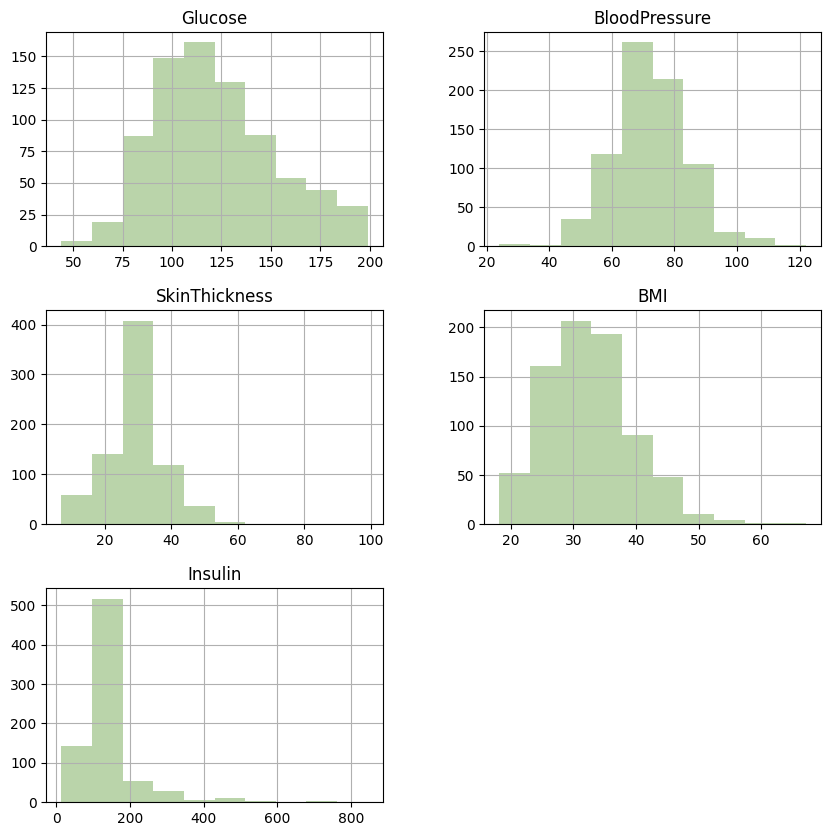

In [23]:
colors=["#F94144","#f8961e","#f9c74f","#bad4aa","#43aa8b","#577590","#89A1EF","#EF9CDA"]
pazienti[zeroFeatures] = pazienti[zeroFeatures].replace({0:np.nan});
plt.style.use('default')
pazienti[zeroFeatures].hist(figsize = (10,10), color=colors[3])
pazienti.describe()

In [24]:
pazienti.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Per poter determinare con maggiore precisione se si tratta di distribuzioni simmetriche o meno si è scelto di utilizzare skew di scipy.stats

In [25]:
from scipy.stats import skew
for i in range(0,5):
  print(zeroFeatures[i])
  print(pazienti[zeroFeatures[i]].skew())

Glucose
0.5327186599872982
BloodPressure
0.13730536744146796
SkinThickness
0.8221731383793047
BMI
0.5982526551146302
Insulin
3.380019128212173


La distribuzione dell'insulina è fortemente asimmetrica.

In [26]:
for i in range(0,4):
  pazienti[zeroFeatures[i]].fillna(pazienti[zeroFeatures[i]].mean(),inplace=True)
pazienti["Insulin"].fillna(pazienti["Insulin"].median(),inplace= True)
pazienti.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

A seguito delle modifiche effettuate, per ogni features, si vuole osservare nel dettaglio la sua distribuzione utilizzando anche un boxplot per rilevare l'eventuale presenza di outliers.

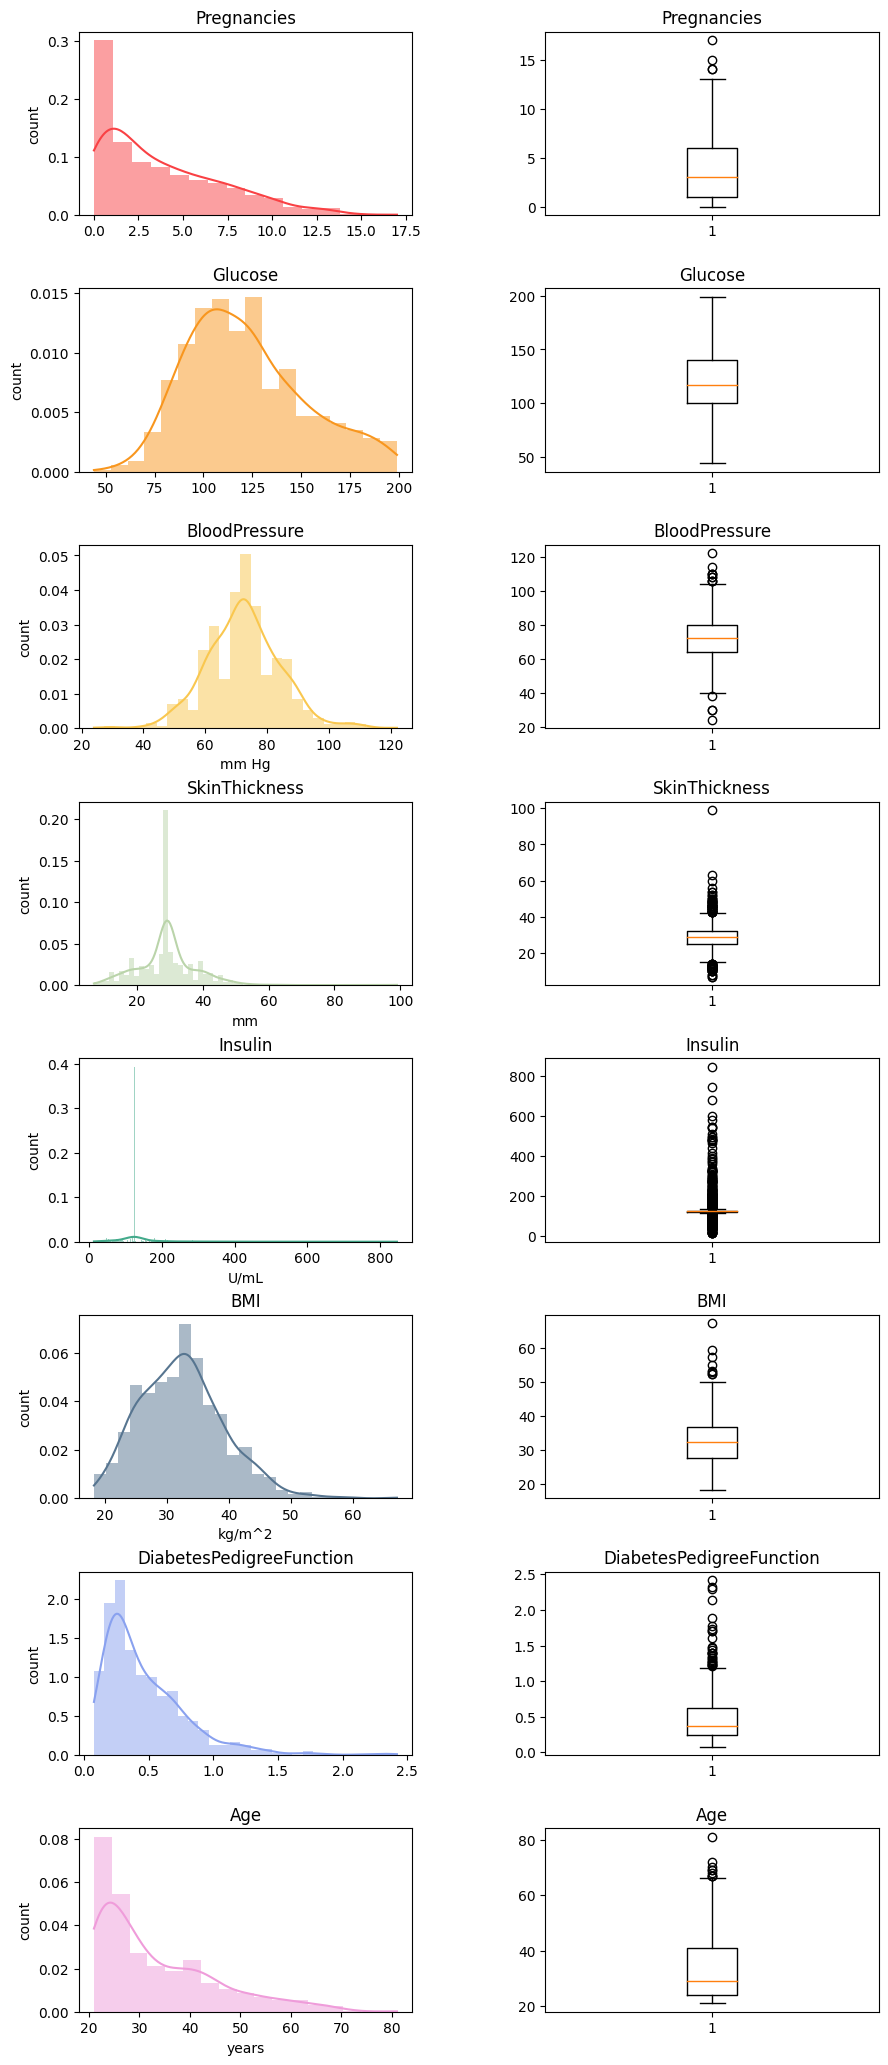

In [34]:
categories= ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
units = ["","","mm Hg","mm","U/mL","kg/m^2","","years"]
plt.figure(figsize=(10, 18))
it = 1
for i in categories:
  plt.subplot(8,2,it)
  sns.histplot(pazienti[i], color = colors[categories.index(i)],kde=True, stat="density", linewidth=0)
  plt.title(i)
  plt.ylabel("count")
  plt.xlabel(units[categories.index(i)])
  it = it + 1

  plt.subplot(8,2,it)
  plt.boxplot(pazienti[i])
  plt.title(i)
  it = it + 1
  # set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.2, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

 I due diagrammi permettono di visualizzare l'andamento generale dei dati, l'eventuale presenza di outliers e di identificare la presenza di asimmetrie.
Le età dei pazienti assumono un valore da 21 a 80 circa, ed è posssibile notare che sono ripartiti in maniera abbastanza squilibrata avendo una maggiore affluenza per le fasce di età dai 20 ai 40 anni.
Diverso è invece per il glucosio in cui, come è possibile notare, non sono presenti outliers e i valori sono equamente ripartiti.
La pressione sanguigna invece ne presenta alcuni ma anche in questo caso la distribuzione risulta essere abbastanza simmetrica.
Per lo spessore della pelle e l'insulina possiamo notare come entrambe presentino un valore di picco abbastanza accentuato,  nonostante la presenza di outliers sia massiccia essi sono distributi in maniera  uniforme  eccezion fatta per i valori di bordo.
Più in generale possiamo notare che i valori anomali all'interno del dataset posso essere diminuiti rimuovendo i valori esterni.

In [35]:
zeroFeatures=["Pregnancies","BloodPressure","Insulin","SkinThickness","DiabetesPedigreeFunction","Age"]


In [36]:
pazienti=pazienti[pazienti["Pregnancies"].values<13]
pazienti=pazienti[pazienti["BloodPressure"].values<105]
pazienti=pazienti[pazienti["BloodPressure"].values>40]

pazienti=pazienti[pazienti["SkinThickness"].values<105]
pazienti=pazienti[pazienti["SkinThickness"].values>15]


pazienti=pazienti[pazienti["Insulin"].values<550]
pazienti=pazienti[pazienti["BMI"].values<50]
pazienti=pazienti[pazienti["DiabetesPedigreeFunction"].values<1.7]
pazienti=pazienti[pazienti["Age"].values<80]

Osserviamo di seguito come la variabile target sia ripartita all'interno del dataset.

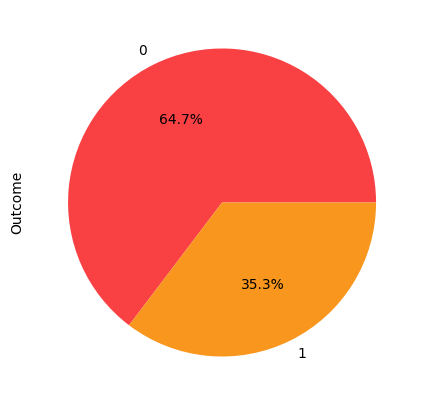

In [37]:
 pazienti["Outcome"].value_counts().plot.pie(figsize=(5, 5),autopct='%1.1f%%',colors=colors)

Come è possibile notare nel dataset il rapporto tra pazienti sani e pazienti malati non è del tutto bilanciato, questo potrebbe incidere negativamente sull'accuratezza del modello in quanto potrebbe portare a un verificarsi elevato di errori di classificazione per la parte meno rappresentata. Valuteremo quindi successivamente se sia opportuno ricorre a tecniche di oversampling per garantire un migliore bilanciamento.

Al fine di rendere completa l'analisi sul dataset è importante comprendere in quale misura la variabile target è distribuita tra le varie features, ciò ci permetterà di identificare le caratteristiche più comuni tra i pazienti affetti da diabete.

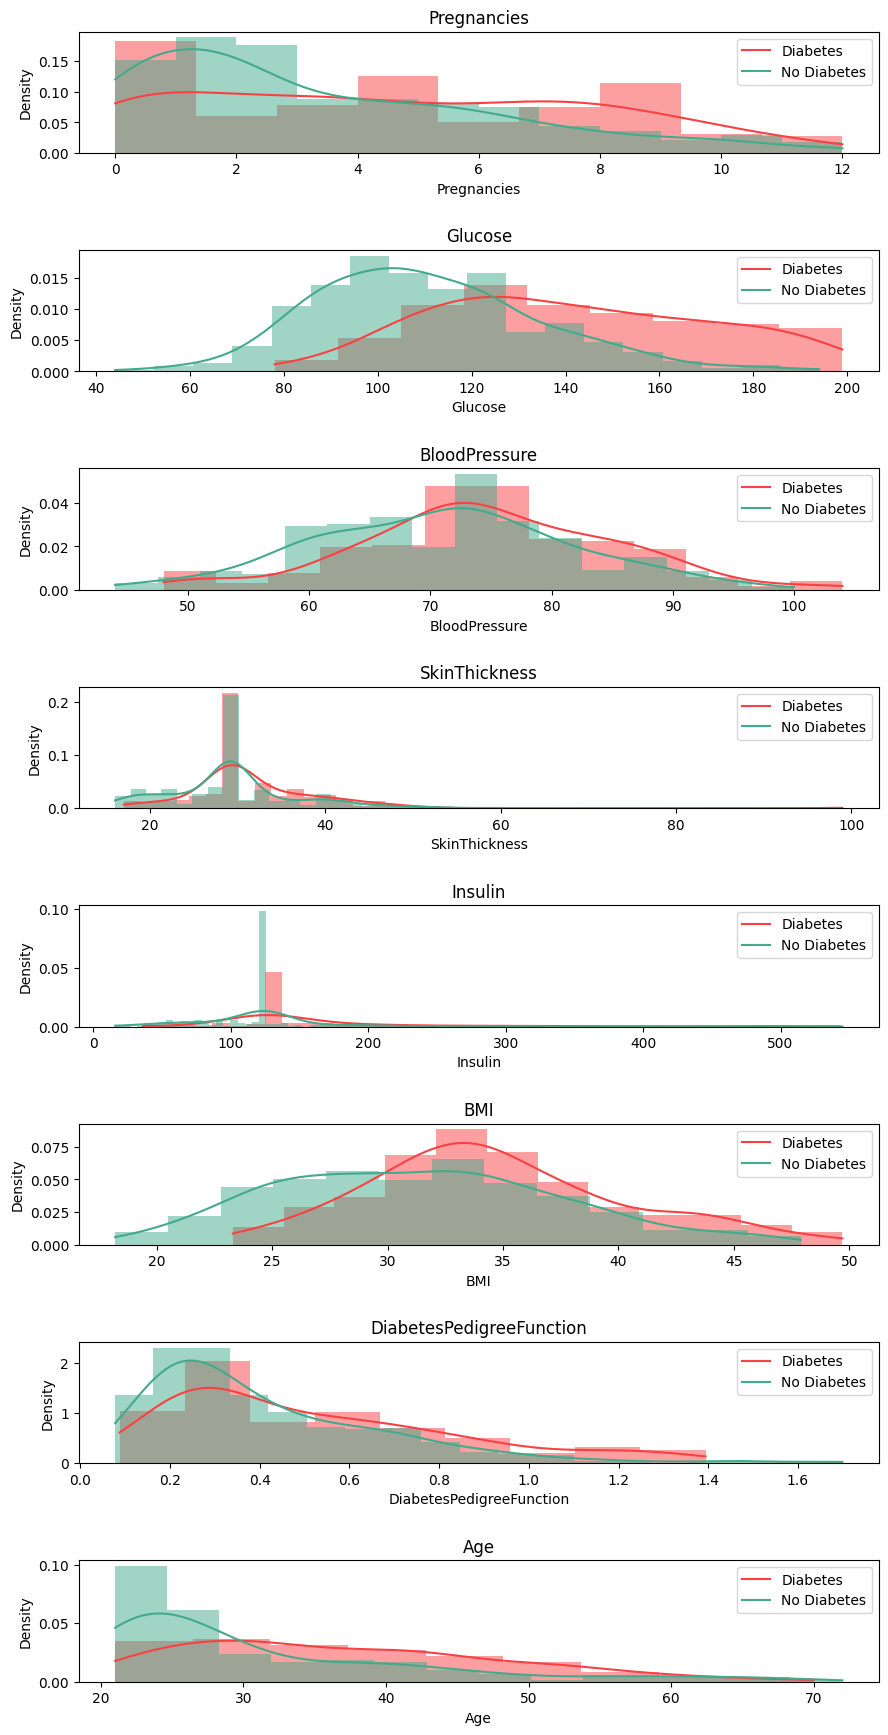

In [38]:
it = 1
plt.figure(figsize=(10,15))

for i in categories:
 plt.subplot(8,1,it) 
 ax = sns.histplot(pazienti[i][pazienti.Outcome == 1], color=colors[0],kde=True, stat="density", linewidth=0)
 sns.histplot(pazienti[i][pazienti.Outcome == 0], color=colors[4],kde=True, stat="density", linewidth=0)
 plt.legend(['Diabetes', 'No Diabetes'])
 it = it + 1
 plt.title(i)
 plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.2, 
                    wspace=0.2, 
                    hspace=0.8)


Le informazioni che siamo in grado di ricavare sono le seguenti:

* Le pazienti che hanno avuto molte gravidanze hanno probabilità maggiori di incorrere in diabete.


*   Tendenzialmente chi  presenta livelli di glucosio, indice di massa corporea e glucosio più alti ha maggiori probabilità di incorrere in diabete.
* Lo stesso vale per spessore della pelle, diabete pedigree function, pressione sanguigna e insulina che però sembrerebbero essere meno determinanti.

*  Dai 30 anni circa si hanno maggiori probabilità di essere affetti da diabete.


Correlazione tra features

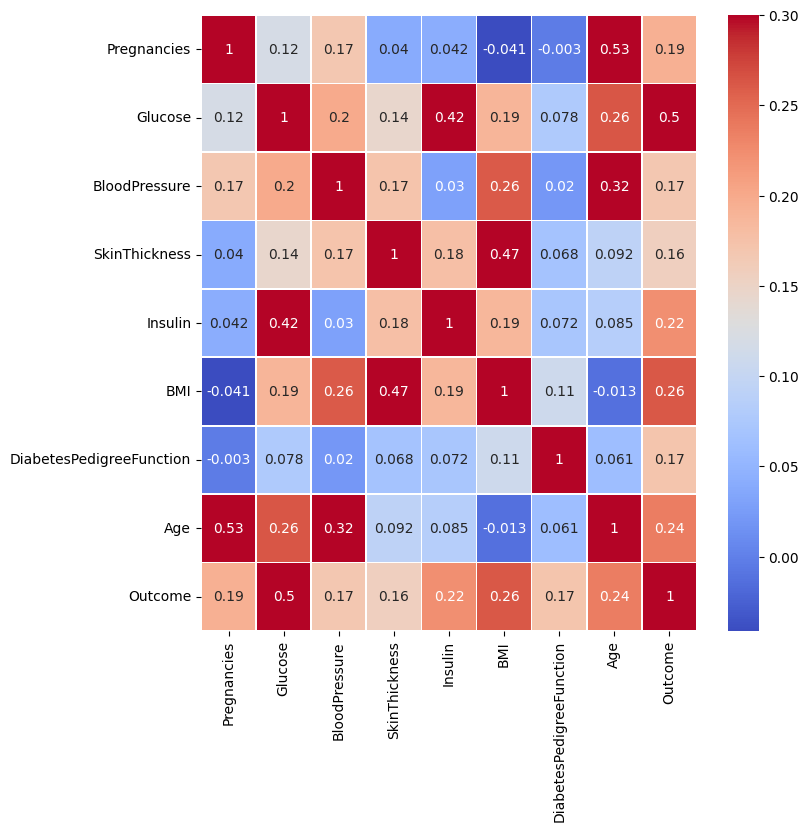

In [39]:
fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(pazienti.corr(), cmap ="coolwarm",vmax=.3, annot=True,linewidths=.5,ax=ax)


Utilizzando la Heatmap ci è possibile determinare in maniera abbastanza immediata le correlazioni che esistono tra le varie features. L'Indice di correlazione utilizzato è quello di Pearson, e i valori che può assumere vanno da -1 a 1, dove il valore 0 indica che non è presente alcuna correlazione.



E' possibile confermare le considerazioni iniziali fatte a seguito della visualizzazione degli histplot.
 
Infatti la variabile maggiormente correlata alla  variabile target risulta essere il Glucosio.
Il valore del Glucosio come intubile presenta una forte correlazioe anche con il valore di Insulina.

Anche l'età ha un alto indice di correlazione, seguita dal Numero di gravidanze e dalL'indice di massa corporea che sono correlati alla variabile target con valore pari a 0.20 circa.

La spessore della pelle risulta essere la features meno rilevante. 

Si possono notare altre dipendenze interessanti come quelle presenti tra numero di gravitanze e età o spessore della pelle e indice di massa corporea.


Per completezza si illustrano le tutte le relazioni utilizzando un pairplot.


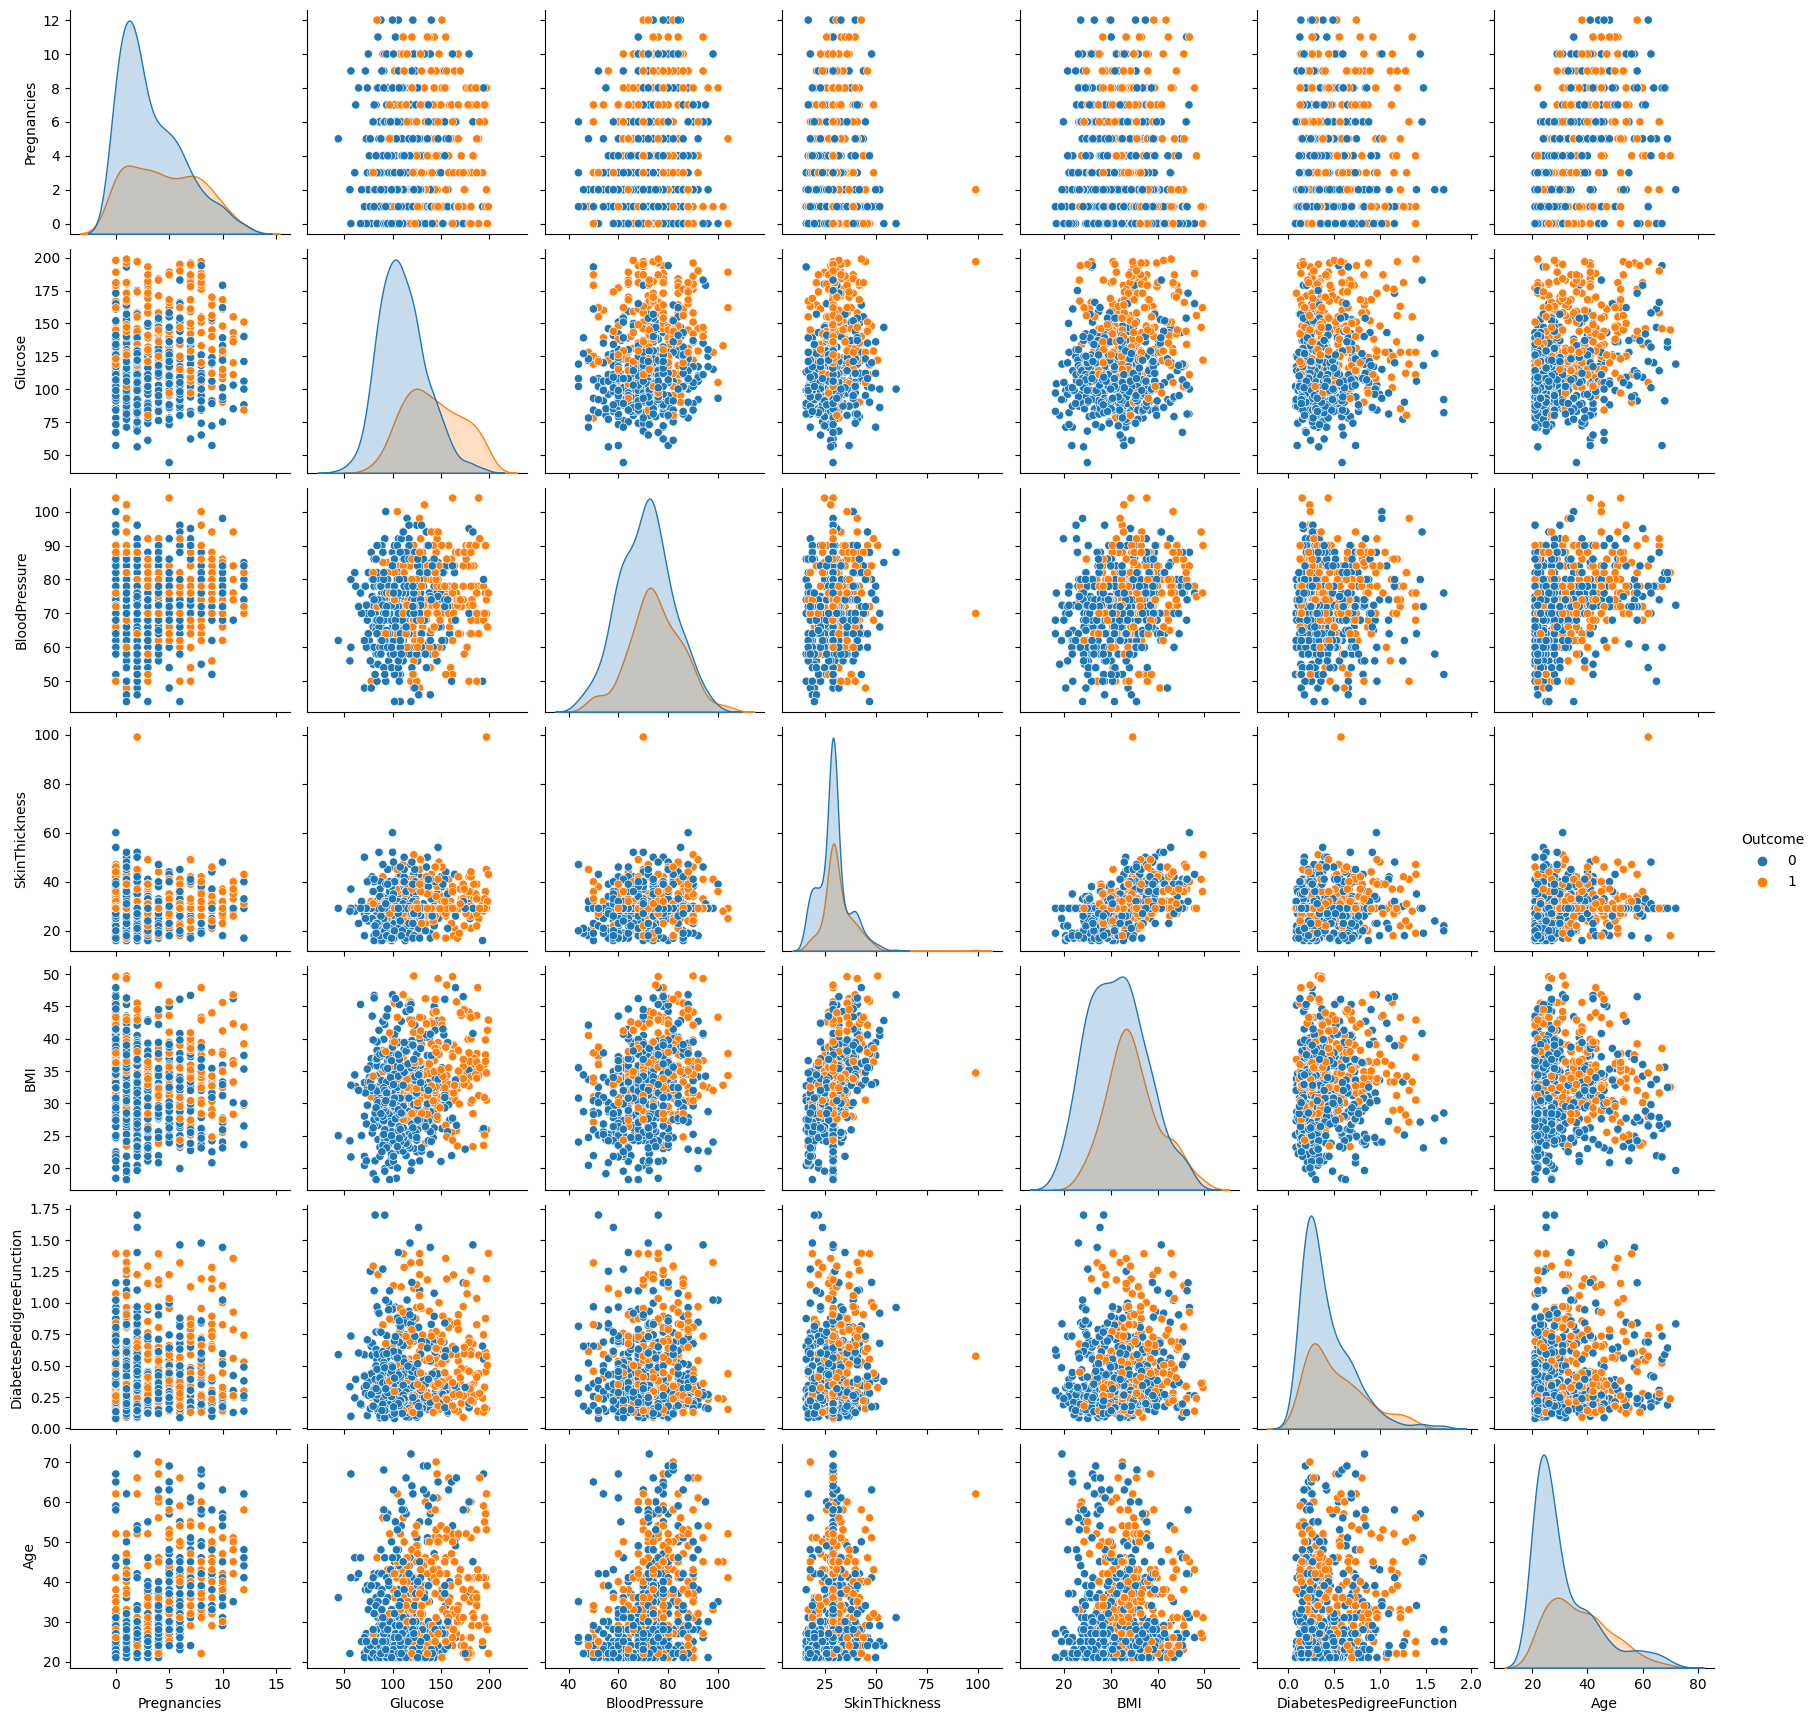

In [155]:

sns.pairplot(pazienti, hue = 'Outcome')

In [156]:
pazienti.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
count,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000
mean,3.767511,121.505863,72.344815,30.153709,32.534985,0.457152,33.338301,0.353204
std,3.131385,30.153504,10.783461,7.574599,6.204013,0.298951,11.669210,0.478322
min,0.000000,44.000000,44.000000,16.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.500000,27.000000,27.950000,0.238500,24.000000,0.000000
50%,3.000000,117.000000,72.405184,29.153420,32.457464,0.362000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.500000,36.450000,0.613500,41.000000,1.000000
max,12.000000,199.000000,104.000000,99.000000,49.700000,1.699000,72.000000,1.000000


# Preprocessing

In [157]:
from sklearn.model_selection import train_test_split
import datetime as dt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [158]:
def make_matrix(pred,val,title):
  matrix = confusion_matrix(pred,val)
  plt.figure(figsize = (5, 3))
  sns.heatmap(matrix, cmap = 'Blues', annot = True,fmt='5',
              yticklabels = ['No Diabetes', 'Diabetes'], xticklabels = ['Predicted No Diabetes', 'Predicted Diabetes'])

  plt.yticks(rotation = 0)
  plt.title(title)
  plt.show()


In [159]:
def result(pred,val):
    matrix = confusion_matrix(val,pred)
    print("Precision",precision_score(pred,val))
    print("Accuracy",accuracy_score(pred,val))
    print( "Recall",recall_score(pred,val))
    print( "F1-score", f1_score(pred,val))



**Split**

Si procede alla divisione del dataset al fine di ottenere training set e validation set. Si sceglie di mantenere una proporzione pari a 2/3 per i dati di training e 1/3 per i dati di validazione.


In [48]:
pazienti["Outcome"]

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 671, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split
x = pazienti.drop(["Outcome"],axis=1)
x_train,x_val,y_train,y_val = train_test_split(x,pazienti["Outcome"],test_size = 1/3, random_state = 0)


**Selezione delle features significative con Regolarizzazione**

Il numero di features presenti può impattare l'efficienza del modello di classificazione. Molti dati possono risultare con ridondati o non sufficientemente incivisi, avere un numero di features elevato potrebbe portare a:

*   Overfitting.
*   Aumento del costo computazionale.
*   Inferiore leggibilità di risultati.
* Riduzione di collinearità

Esistono diversi criteri di selezione, in questo caso si è scelto di utilizzare la Regressione Logistica con regolarizzazione L1. Gli attributi non utili alla predizione della variabile target riporteranno un coefficiente pari a 0.







In [50]:
y_train

762    0
57     0
203    0
634    0
420    0
      ..
10     0
421    0
225    0
725    0
647    1
Name: Outcome, Length: 447, dtype: int64

In [51]:
from sklearn.linear_model import LogisticRegression
model = Pipeline([
    ("model", LogisticRegression(solver="saga", random_state=42))
])
model.fit(x_train, y_train)
#for i in range(0,8):
 #print(feat[i], " ",model.coef_[0][i])
model.score(x_val,y_val)

0.6607142857142857


Utilizzando la regolarizzazione con il default non vengono eliminati parametri, lo score infatti non varia rispetto a quello calcolato precedentemente (l'Insulina ha però un peso molto basso) si sceglie  quindi di rimuoverla.

In [55]:
model = Pipeline([
    ("model", LogisticRegression(solver="saga", random_state=42, penalty='l1',C=1))
])
model.fit(x_train, y_train)
model.score(x_val,y_val)
pred= model.predict(x_val)
result(pred,y_val)


Precision 0.3409090909090909
Accuracy 0.65625
Recall 0.6122448979591837
F1-score 0.43795620437956206


In [56]:
model.named_steps["model"].coef_[0]

array([ 0.01659727,  0.02571706, -0.06645459, -0.0031568 ,  0.00038169,
        0.004219  ,  0.00336529,  0.02562028])

In [61]:
pazienti.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000
mean,3.767511,121.505863,72.344815,30.153709,138.660209,32.534985,0.457152,33.338301,0.353204
std,3.131385,30.153504,10.783461,7.574599,72.929045,6.204013,0.298951,11.669210,0.478322
min,0.000000,44.000000,44.000000,16.000000,16.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.500000,27.000000,125.000000,27.950000,0.238500,24.000000,0.000000
50%,3.000000,117.000000,72.405184,29.153420,125.000000,32.457464,0.362000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.500000,125.000000,36.450000,0.613500,41.000000,1.000000
max,12.000000,199.000000,104.000000,99.000000,545.000000,49.700000,1.699000,72.000000,1.000000


In [64]:
feat=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
pd.Series(model.named_steps["model"].coef_[0], index=feat)

Pregnancies                 0.016597
Glucose                     0.025717
BloodPressure              -0.066455
SkinThickness              -0.003157
Insulin                     0.000382
BMI                         0.004219
DiabetesPedigreeFunction    0.003365
Age                         0.025620
dtype: float64

In [65]:
pazienti=pazienti.drop(['Insulin'], axis = 1)

**Standardizzazione**

Si procede alla standardizzazione utilizzando RobustScaler di sklearn.

 

In [66]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_train= scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
model.fit(x_train, y_train)
model.score(x_val,y_val)
model.fit(x_train, y_train)
model.score(x_val,y_val)
pred= model.predict(x_val)
result(pred,y_val)

Precision 0.5340909090909091
Accuracy 0.6919642857142857
Recall 0.6266666666666667
F1-score 0.5766871165644173


E' possibile notare che riccorrere alla standardizzazione ha portato un miglioramento delle prestazioni del modello.

##MODELLI

Nelle seguente sezione verranno generati diversi modelli di learning che verranno applicati al dataset, l'obiettivo ultimo sarà quello di valutare quale dei modelli si dimostra come più accurato e che meglio si addice al problema di classificazione proposto.
Si utilizzerà  Grid Search applicandola a 5-Cross Stratified Fold Validation per identificare i migliori iperparametri.

In [67]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import math
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

skf = StratifiedKFold(5, shuffle=True, random_state=42)

Visualizzando la distribuzione della variabile target è stato possibile osservare che il problema è sbilanciato. Quindi si è deciso di ricorrere a una tecnica di oversampling.

In [68]:
pazienti["Outcome"].value_counts()

0    434
1    237
Name: Outcome, dtype: int64

In [69]:
oversample = SMOTE(random_state=42, k_neighbors=10)
X_smote, y_smote = oversample.fit_resample(x_train, y_train)
x_train, y_train = X_smote, y_smote
y_smote.value_counts()

0    298
1    298
Name: Outcome, dtype: int64

##Perceptron




Si è scelto di iniziare con Perceptron, uno dei più semplici modelli di classificazione. E' un modello di classificazione lineare che permette di identificare un iperpiano di separazione non ottimale.

Parametri:

*   **Penalty**: termine di regolarizzazione
*   **Alpha**: costante che moltiplica il termine di regolarizzazione se utilizzato
*   **Fit Intercept**: True se si vuole stimare l'intercetta False altrimenti

In [70]:
model = Perceptron(n_jobs=-1,random_state = 42)
grid = {
    'penalty':[None,"elasticnet","l1","l2"], 
    'alpha':[0.0001,0.0001, 0.001, 0.01], 
    'fit_intercept':[True,False]
     }

per_grd = GridSearchCV(model,grid,cv=skf)
per_grd.fit(x_train,y_train)

print("Best Params:",per_grd.best_params_)
print("Score:",per_grd.best_score_ *100,"%")



Best Params: {'alpha': 0.001, 'fit_intercept': False, 'penalty': 'l1'}
Score: 73.65966386554622 %


Per completezza visualizziamo con maggiore dettaglio le 5 parametrizzazione con accuratezza migliore.





In [71]:
pred_per=per_grd.predict(x_val)
print(classification_report(pred_per,y_val))
pd.DataFrame(per_grd.cv_results_).sort_values("rank_test_score").head(5)

              precision    recall  f1-score   support

           0       0.62      0.82      0.71       104
           1       0.78      0.57      0.66       120

    accuracy                           0.69       224
   macro avg       0.70      0.70      0.69       224
weighted avg       0.71      0.69      0.68       224



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_fit_intercept,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
22,0.001835,0.000417,0.000430,0.000064,0.001,False,l1,"{'alpha': 0.001, 'fit_intercept': False, 'pena...",0.725000,0.739496,0.731092,0.756303,0.731092,0.736597,0.010879,1
23,0.001273,0.000079,0.000382,0.000013,0.001,False,l2,"{'alpha': 0.001, 'fit_intercept': False, 'pena...",0.716667,0.722689,0.731092,0.756303,0.714286,0.728207,0.015199,2
26,0.001760,0.000176,0.000412,0.000046,0.01,True,l1,"{'alpha': 0.01, 'fit_intercept': True, 'penalt...",0.691667,0.747899,0.672269,0.756303,0.747899,0.723207,0.034363,3
3,0.001257,0.000085,0.000378,0.000021,0.0001,True,l2,"{'alpha': 0.0001, 'fit_intercept': True, 'pena...",0.708333,0.705882,0.655462,0.756303,0.697479,0.704692,0.032106,4
11,0.001288,0.000063,0.000389,0.000012,0.0001,True,l2,"{'alpha': 0.0001, 'fit_intercept': True, 'pena...",0.708333,0.705882,0.655462,0.756303,0.697479,0.704692,0.032106,4


##Logistic Regression


Può essere considerata come l'evoluzione di Perceptron, anch'essa restituisce un piano di separazione lineare non ottimale.
E'basata sulla regressione lineare.

Parametri:
* **Solver**: algoritmo da usare nel problema di ottimizzazione
*   **Penalty**: termine di regolarizzazione
*   **C**: Parametro di regolarizzazione, l'intensità di regolarizzazione è inversamente proporzionale al parametro. Deve assumere valore positivo.
*   **Fit Intercept**: True se si vuole stimare l'intercetta False altrimenti
* **L1 ratio**: Utilizzato solo se selezionato "elasticnet". Assume valori da 0 a 1 dove 0 è equivalente a utilizzare una penalità l2 e 1 una penalità l1, i valori intermedi sono una combinazione delle due.

In [72]:
model = LogisticRegression(random_state=42, solver="saga")
grid = {
    'penalty':["l1","l2"],
    'C':[0.1,0.5, 1],
    'fit_intercept':[True,False],
    },{
    'penalty':["elasticnet"],
    'C':[0.1,0.5, 1],
    'fit_intercept':[True,False],
    'l1_ratio':[0.2,0.5,0.8]}

lgr_grd= GridSearchCV(model,grid,cv=skf)
lgr_grd.fit(x_train,y_train)



GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(random_state=42, solver='saga'),
             param_grid=({'C': [0.1, 0.5, 1], 'fit_intercept': [True, False],
                          'penalty': ['l1', 'l2']},
                         {'C': [0.1, 0.5, 1], 'fit_intercept': [True, False],
                          'l1_ratio': [0.2, 0.5, 0.8],
                          'penalty': ['elasticnet']}))

In [73]:
print("Best Params:",lgr_grd.best_params_)
print("Score:",lgr_grd.best_score_ *100,"%")
pred_lgr=lgr_grd.predict(x_val)
print(classification_report(pred_lgr,y_val))
pd.DataFrame(lgr_grd.cv_results_).sort_values("rank_test_score").head(5)

Best Params: {'C': 1, 'fit_intercept': True, 'l1_ratio': 0.8, 'penalty': 'elasticnet'}
Score: 73.99579831932772 %
              precision    recall  f1-score   support

           0       0.62      0.85      0.72       100
           1       0.83      0.59      0.69       124

    accuracy                           0.71       224
   macro avg       0.73      0.72      0.70       224
weighted avg       0.74      0.71      0.70       224



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_fit_intercept,param_penalty,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
26,0.013732,0.001484,0.000847,0.000200,1,True,elasticnet,0.8,"{'C': 1, 'fit_intercept': True, 'l1_ratio': 0....",0.725,0.697479,0.747899,0.764706,0.764706,0.739958,0.025753,1
1,0.011042,0.000268,0.000707,0.000026,0.1,True,l2,NaN,"{'C': 0.1, 'fit_intercept': True, 'penalty': '...",0.725,0.697479,0.739496,0.764706,0.764706,0.738277,0.025453,2
24,0.014992,0.002994,0.000835,0.000132,1,True,elasticnet,0.2,"{'C': 1, 'fit_intercept': True, 'l1_ratio': 0....",0.725,0.697479,0.739496,0.764706,0.764706,0.738277,0.025453,2
4,0.012673,0.000424,0.000723,0.000030,0.5,True,l1,NaN,"{'C': 0.5, 'fit_intercept': True, 'penalty': '...",0.725,0.697479,0.739496,0.764706,0.764706,0.738277,0.025453,2
20,0.013156,0.000379,0.001237,0.001010,0.5,True,elasticnet,0.8,"{'C': 0.5, 'fit_intercept': True, 'l1_ratio': ...",0.725,0.697479,0.739496,0.764706,0.764706,0.738277,0.025453,2


##SVM
Individua la separazione lineare ottimale utilizzando criteri geometrici. Il miglior iperpiano secondo SVM è quello che massimizza la distanza dai data points di entrambe le classi. Ha il pregio di essere veloce e di avere buone prestazioni se applicato a training set piccoli.

Parametri:


*   **C**: Parametro di regolarizzazione, l'intensità di regolarizzazione è inversamente proporzionale al parametro. Deve assumere valore positivo.
*   **Kernel**: Specifica il tipo di kernel da utilizzare nell'algoritmo.





In [74]:
model = SVC(random_state=42)
grid = {
    "kernel":["linear","rbf"],
    "C":[0.01,0.1,1] 
}
svm_grd=GridSearchCV(model,grid,cv=skf)
svm_grd.fit(x_train,y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(random_state=42),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [75]:
print("Best Params:",lgr_grd.best_params_)
print("Score:",lgr_grd.best_score_ *100,"%")
pred_svm=svm_grd.predict(x_val)
print(classification_report(pred_svm,y_val))
pd.DataFrame(svm_grd.cv_results_).sort_values("rank_test_score").head(5)

Best Params: {'C': 1, 'fit_intercept': True, 'l1_ratio': 0.8, 'penalty': 'elasticnet'}
Score: 73.99579831932772 %
              precision    recall  f1-score   support

           0       0.71      0.80      0.75       121
           1       0.73      0.62      0.67       103

    accuracy                           0.72       224
   macro avg       0.72      0.71      0.71       224
weighted avg       0.72      0.72      0.72       224



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.108670,0.061991,0.001810,0.000052,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.750000,0.739496,0.705882,0.789916,0.747899,0.746639,0.026825,1
0,0.019013,0.002470,0.001765,0.000076,0.01,linear,"{'C': 0.01, 'kernel': 'linear'}",0.766667,0.747899,0.672269,0.798319,0.747899,0.746611,0.041487,2
4,0.563447,0.153851,0.001654,0.000113,1,linear,"{'C': 1, 'kernel': 'linear'}",0.741667,0.739496,0.705882,0.773109,0.764706,0.744972,0.023452,3
3,0.013694,0.000672,0.004444,0.000279,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.741667,0.605042,0.596639,0.605042,0.571429,0.623964,0.060128,4
5,0.012782,0.000416,0.003930,0.000106,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.583333,0.613445,0.596639,0.605042,0.579832,0.595658,0.012710,5


## K Nearest Neighbors Classifier
E' un classificatore che svolge le predizioni considerando la prossimità, l'idea di base è che punti simili possano trovarsi vicini tra loro.
Parametri:
* **Num Neighbors**: Numero di vicini da considerare per la classificazione
* **Weights**: Funzioni di assegnazione del peso dei nodi, tutti i nodi possono avere lo stesso peso oppure gli può essere assegnato un peso inversamente proporzionale alla loro distanza.


In [76]:
model = KNeighborsClassifier(n_jobs=-1)
grid = {"n_neighbors":[2,5,8,10],
        "weights":["uniform","distance"]
        }

knn_grd= GridSearchCV(model,grid,cv=skf)
knn_grd.fit(x_train,y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid={'n_neighbors': [2, 5, 8, 10],
                         'weights': ['uniform', 'distance']})

In [77]:
print("Best Params:",knn_grd.best_params_)
print("Score:",knn_grd.best_score_ *100,"%")
pred_knn=knn_grd.predict(x_val)
print(classification_report(pred_knn,y_val))
pd.DataFrame(knn_grd.cv_results_).sort_values("rank_test_score").head(5)

Best Params: {'n_neighbors': 2, 'weights': 'distance'}
Score: 79.02521008403362 %
              precision    recall  f1-score   support

           0       0.74      0.69      0.71       145
           1       0.49      0.54      0.51        79

    accuracy                           0.64       224
   macro avg       0.61      0.62      0.61       224
weighted avg       0.65      0.64      0.64       224



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.001601,0.000075,0.010185,0.001176,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",0.800000,0.815126,0.815126,0.798319,0.722689,0.790252,0.034532,1
7,0.001633,0.000129,0.009360,0.000250,10,distance,"{'n_neighbors': 10, 'weights': 'distance'}",0.750000,0.806723,0.815126,0.773109,0.714286,0.771849,0.037099,2
5,0.001630,0.000022,0.009737,0.000458,8,distance,"{'n_neighbors': 8, 'weights': 'distance'}",0.766667,0.806723,0.798319,0.773109,0.705882,0.770140,0.035447,3
3,0.001592,0.000106,0.009435,0.000571,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.766667,0.789916,0.764706,0.781513,0.731092,0.766779,0.020151,4
0,0.002345,0.000573,0.282388,0.517326,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",0.783333,0.798319,0.773109,0.714286,0.705882,0.754986,0.037623,5


##Random forest

Consiste nella combinazione di più alberi decisionali sullo stesso dataset al fine di ridurne l'errore. A differenza degli Alberi Decisionali viene considerato  un sottoinsieme casuale di features e del dataset di trainingm caratteristica che assicura bassa correlazioni tra gli alberi.
Appartiene agli algoritmi di bagging.
La previsione finale essende alberi indipendenti viene calcolata facendo la media tra le previsioni di tutti gli alberi.
Parametri:

*   **Estimators Number** : numero di alberi coinvolti.
*   **Max Depth** : profondità massima dell'albero.
* **Min Samples Leaf** : numero minimo di istanze per essere considerato una foglia.
* **Min Samples Split** : numero minimo di istanze per poter splittare un nodo.



In [127]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)
grid = {
     "n_estimators": [100, 150, 200],
    "max_depth": [2,5,10],
    "min_samples_leaf": [1, 2, 3],
    "min_samples_split": [2, 4, 6]
    }
rndf_grd= GridSearchCV(model,grid,cv=skf)
rndf_grd.fit(x_train,y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'max_depth': [2, 5, 10], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]})

In [79]:
print("Best Params:",rndf_grd.best_params_)
print("Score:",rndf_grd.best_score_ *100,"%")
pred_rnf=rndf_grd.predict(x_val)
result(pred_rnf,y_val)
print(classification_report(pred_rnf,y_val))


Best Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 200}
Score: 82.04061624649859 %
Precision 0.7386363636363636
Accuracy 0.7410714285714286
Recall 0.65
F1-score 0.6914893617021277
              precision    recall  f1-score   support

           0       0.74      0.81      0.78       124
           1       0.74      0.65      0.69       100

    accuracy                           0.74       224
   macro avg       0.74      0.73      0.73       224
weighted avg       0.74      0.74      0.74       224



## XGBoost
Si tratta di un'altra applicazione dell'Esemble Learning dove si utilizzano alberi decisionali generati in sequenza e vengono addestrati sugli errori degli alberi precedenti.
La previsione finale viene calcolata sommando le previsioni di tutti gli alberi.

Parametri:

*   **Estimators Number** : numero di alberi coinvolti.
*   **Max Depth** : profondità massima dell'albero.
*   **Lambda** peso della regressione L2
*   **Alpha** peso della regressione L1




In [80]:
from pandas.core.common import random_state

model =  XGBClassifier(random_state=42, objective='binary:logistic')
grid ={
        'max_depth': [3, 5, 7], 
        'n_estimators': [100,150,200],
        'alpha':[0.0,0.5,1],
        'lambda':[0.0,0.5,1]
}
xg_grd= GridSearchCV(model,grid,cv=skf)
xg_grd.fit(x_train,y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(random_state=42),
             param_grid={'alpha': [0.0, 0.5, 1], 'lambda': [0.0, 0.5, 1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 150, 200]})

In [81]:
print("Best Params:",xg_grd.best_params_)
print("Score:",xg_grd.best_score_ *100,"%")
pred_xg=xg_grd.predict(x_val)
print(classification_report(pred_xg,y_val))


Best Params: {'alpha': 0.0, 'lambda': 0.0, 'max_depth': 3, 'n_estimators': 200}
Score: 81.20448179271709 %
              precision    recall  f1-score   support

           0       0.72      0.77      0.74       128
           1       0.66      0.60      0.63        96

    accuracy                           0.70       224
   macro avg       0.69      0.68      0.69       224
weighted avg       0.69      0.70      0.69       224



##Valutazione dei modelli

Oltre al calcolo dell'accuratezza possiamo avvalerci di altri strumenti per verificare la validità del nostro modello, uno di questi è la matrice di confusione.
La matrice di confusione, o tabella di errata classificazione, presenta in riga i valori reali e in colonna i valori predetti. I valori sulla  diagonale i=j sono quelli corretti, esternamente sono errati.

La matrice di confusione permette di calcolare altri indicatori sulle performance del modello: **Precision, Recall, F1-Score**.


*   **Precision**: Misura di precisione del modello. Rapporto tra il numero di classificazioni corrette e somma tra classificazioni corrette e falsi positivi.
*   **Recall**: Misura di sensibilità del modello. E' data dal rapporto tra numero di classificazioni corrette e somma tra classificazioni corrette e falsi negativi.
*  **F1 Score**: Misura unica di accuratezza del modello. E' data dalla media armonica di precision e recall




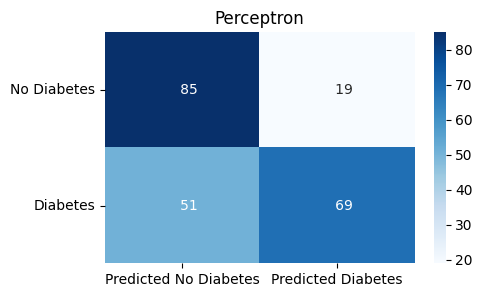

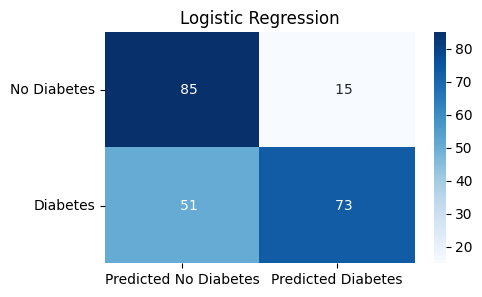

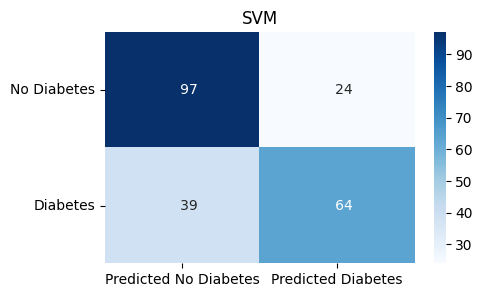

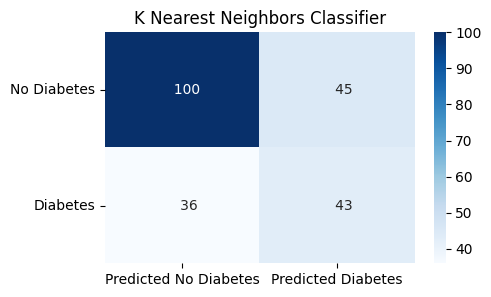

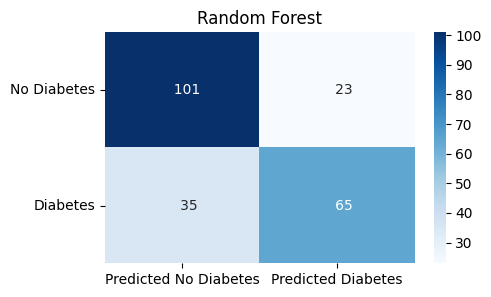

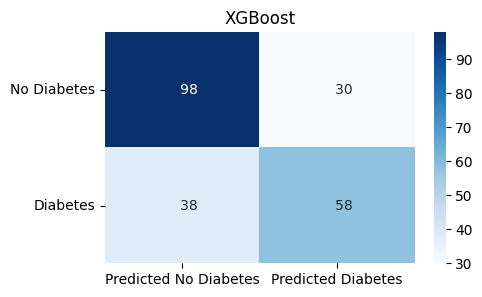

----------
Perceptron
Precision 0.7840909090909091
Accuracy 0.6875
Recall 0.575
F1-score 0.6634615384615384
None
----------
Logistic Regression
Precision 0.8295454545454546
Accuracy 0.7053571428571429
Recall 0.5887096774193549
F1-score 0.6886792452830188
None
----------
SVM
Precision 0.7272727272727273
Accuracy 0.71875
Recall 0.6213592233009708
F1-score 0.6701570680628272
None
----------
K Nearest Neighbors Classifier
Precision 0.48863636363636365
Accuracy 0.6383928571428571
Recall 0.5443037974683544
F1-score 0.5149700598802396
None
----------
Random Forest
Precision 0.7386363636363636
Accuracy 0.7410714285714286
Recall 0.65
F1-score 0.6914893617021277
None
----------
XGBoost
Precision 0.6590909090909091
Accuracy 0.6964285714285714
Recall 0.6041666666666666
F1-score 0.6304347826086956
None


In [165]:
nome_modelli=["Perceptron","Logistic Regression","SVM","K Nearest Neighbors Classifier","Random Forest","XGBoost"]
modelli = [per_grd, lgr_grd, svm_grd,knn_grd,rndf_grd,xg_grd]
pred=[pred_per,pred_lgr,pred_svm,pred_knn,pred_rnf,pred_xg]
for i in range(0,len(modelli)):
  make_matrix(pred[i],y_val,nome_modelli[i])

for i in range(0,len(modelli)):
  print("----------")
  print(nome_modelli[i])
  print(result(pred[i],y_val))

Per una valutazione quanto più completa dei modelli utilizzati si provvede anche al calcolo degli intervalli di confidenza (con confidenza pari al 95%)

In [108]:
def confidence(acc, N, Z):
    den = (2*(N+Z**2))
    var = (Z*np.sqrt(Z**2+4*N*acc-4*N*acc**2)) / den
    a = (2*N*acc+Z**2) / den
    inf = a - var
    sup = a + var
    return (inf, sup)

In [167]:
for i in range(0,len(modelli)):
  print(nome_modelli[i],"-----------------",confidence(accuracy_score(pred[i],y_val), len(x_val), 1.96))


Perceptron ----------------- (0.6240688671641408, 0.7446083190915735)
Logistic Regression ----------------- (0.6425975139081377, 0.7611917853243113)
SVM ----------------- (0.6565638680908299, 0.7735595158741702)
K Nearest Neighbors Classifier ----------------- (0.573627671536487, 0.698491204033207)
Random Forest ----------------- (0.679981716882515, 0.7940318083034036)
XGBoost ----------------- (0.6333201619635869, 0.7529130807804949)


Risulta abbastanza evidente che i tre migliori modelli tra quelli calcolati utilizzando Grid Search con K validation siano:

* Logistic Regression
* SVM
* Random Forest 

Le prestazioni di Perceptron e XGBoost sono inferiori e si equivalgono quasi tra loro, mentre K Nearest Neighbors Classifier risulta essere il meno soddisfacente.


##Modello migliore

Essendo il contesto del modello di classificazione scelto un contesto medico la misurazione che è opportuno considerare maggiormente è quella della recall, poichè un errore di falso negativo ha un impatto peggiore rispetto a un falso positivo. Per questo motivo il migliore tra i modelli è Random Forest.
Verosimilmente a seguito di una diagnosi falsamente positiva verranno eseguiti altri esami di verifica, il possibile  danno dovuto alla classificazioni per cui risulta essere limitato, per questo motivo non è stata scelta la Regressione Logistica nonostante presenti un precision maggiore.


**Confronto con un modello casuale**

Tutti i modelli utilizzati risultano avere prestazioni migliori di quelle ottenute considerando un modello casuale

In [110]:
from sklearn.dummy import DummyClassifier

In [111]:
random = DummyClassifier(strategy="uniform", random_state=42)
random.fit(x_train, y_train)
random_score = random.score(x_val, y_val)
random_score
print()

In [112]:

from sklearn.dummy import DummyClassifier


In [113]:
random = DummyClassifier(strategy="uniform", random_state=42)
random.fit(x_train, y_train)

random_score = random.score(x_val, y_val)
random_score
pred=random.predict(x_val)
result(pred,y_val)
print("Dummy Classifier","-----------------",confidence(accuracy_score(pred,y_val), len(x_val), 1.96))


Precision 0.4090909090909091
Accuracy 0.4419642857142857
Recall 0.3302752293577982
F1-score 0.3654822335025381
Dummy Classifier ----------------- (0.378449584541967, 0.5074360482836452)


**Informazioni apprese dal modello**

In ultimo è opportuno analizzare le informazioni che l'addestramento del modello ci ha fornito osservando i coefficienti degli iperpiani.



In [152]:
rndf_grd.best_estimator_
model = RandomForestClassifier(max_depth=10, min_samples_split=6, n_estimators=200,
                       n_jobs=-1, random_state=42)
model.fit(x_val,y_val)
feat=["Pregnancies","Glucose","BloodPressure","SkinThickness","BMI","DiabetesPedigreeFunction","Age"]
for i in range(0,len(feat)):
 print(feat[i],"",model.feature_importances_[i])


Pregnancies  0.09597406524535287
Glucose  0.2676157295045125
BloodPressure  0.09167882924244829
SkinThickness  0.05948062901397266
BMI  0.10550541504971454
DiabetesPedigreeFunction  0.16383057181269564
Age  0.08893178918740141


Come facilmente prevedibile le informazioni che sono risultate più influenti nella previsione di diabete sono: Glucosio, indice di massa corporea e ereditarietà.
Nel caso del glucosio avevamo già potuto osservare una forte correlazione con la variabile target.
Lo spessore della pelle, invece, rappresenta la features con peso minore.
